In [1]:
library(rpart)
library(rpart.plot)
library(extrafont)
options(repr.plot.width=12, repr.plot.height=9)

Registering fonts with R


In [2]:
ct <- rpart.control(xval=10, minsplit=1, cp=0.1)

In [18]:
table<-read.csv("GSE16011+GSE61374 标准化.csv",header=TRUE,sep=",",quote="\"");

In [7]:
table

Sample_geo_accession,gender,Revieweddiagnosis,histological,diagno.Ag.at.sis,event,X1p.19q.codel,IDH1,survival,Chemotherapy,Radiotherapy
GSM405200,NA,0,NA,NA,NA,NA,NA,NA,NA,NA
GSM405201,0,OD,3,45,0,1,1,117.84,0,1
GSM405202,1,OD,3,29,0,1,1,140.04,0,1
GSM405203,1,OD,3,39,0,1,0,107.04,0,1
GSM405204,1,OD,3,34,0,1,0,103.08,NA,NA
GSM405205,1,OD,3,48,0,1,1,38.88,1,1
GSM405206,1,OD,3,32,0,1,0,81.72,0,1
GSM405207,0,OD,3,44,0,1,0,97.44,0,1
GSM405208,1,OD,3,51,0,1,1,36.48,1,1
GSM405209,NA,0,NA,NA,NA,0,NA,NA,NA,NA


In [9]:
fit <- rpart(histological~ Revieweddiagnosis+ survival + IDH1,data=table, method="class",control=ct,
             parms = list(split = "gini"),);

In [10]:
fit

n=413 (8 observations deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 413 252 3 (0.01937046 0.20581114 0.38983051 0.38498789)  
  2) Revieweddiagnosis=,A,OA,OD,PA 254  93 3 (0.03149606 0.33464567 0.63385827 0.00000000) *
  3) Revieweddiagnosis=GBM 159   0 4 (0.00000000 0.00000000 0.00000000 1.00000000) *

In [11]:
predict(fit,table[12,])

,1,2,3,4
12,0.03149606,0.3346457,0.6338583,0


In [12]:
table[12,]

,Sample_geo_accession,gender,Revieweddiagnosis,histological,diagno.Ag.at.sis,event,X1p.19q.codel,IDH1,survival,Chemotherapy,Radiotherapy
12,GSM405211,1,OD,3,35,0,1,1,21.96,0,1


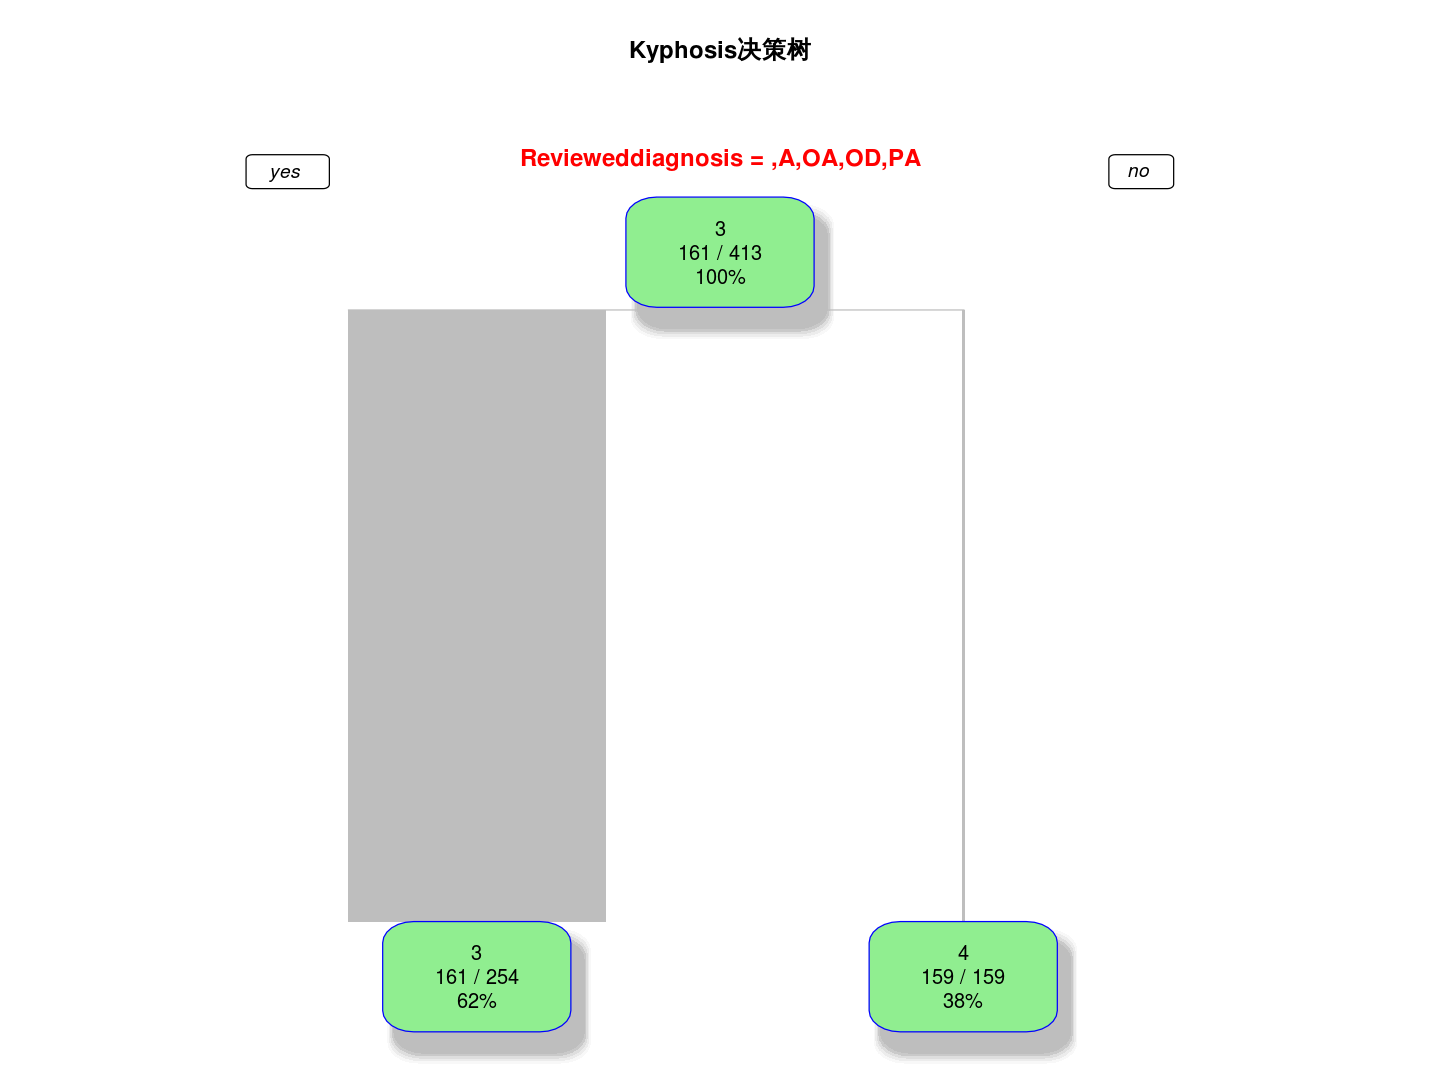

In [24]:
rpart.plot(fit, branch=1, branch.type=3, type=1,extra=102,
shadow.col="grey", box.col="lightgreen",
border.col="blue", split.col="red",
split.cex=1.2, main="Kyphosis决策树",family='Helvetica',font=6);